In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

from rdkit.Chem import Draw # for molecule depiction
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

from activity_cliffs import cliffs_finder # for the training set
from activity_cliffs import cliffs_finder_test # for the training set

# Example with one of the datasets

Searching for activity cliffs within the training set (e.g., for when you evaluate the cross-validation performance)

## Training set

### Calculation

In [2]:
# data import
X_train = pd.read_csv('../descriptors_data/CHEMBL224_train_CATS.csv') # Change with your path
smiles_train = X_train['smiles']
y_train = X_train['Y']

Here, you will obtain two vectors: <div>
    (a) *iscliff*, which tells you whether a compound has a close analog with a very different Y (marked as "True") <div>
    (b) *index_cliff*, which tells you which compound it is <div>
    (c) *max_similarities*, which tells you how close the closest compound is 

In [3]:
iscliff, index_cliff, max_similarities = cliffs_finder(smiles_train, y_train, activity_thr=1, similarity_thr=0.90)

You can see where you have activity cliffs:

In [4]:
# returns the indices of where you have a True
np.where(iscliff)

(array([   1,   14,   20,   35,   86,   95,  119,  129,  130,  132,  140,
         142,  155,  156,  188,  201,  204,  236,  239,  281,  296,  302,
         307,  339,  342,  345,  369,  376,  402,  404,  411,  414,  464,
         466,  500,  501,  504,  516,  526,  548,  553,  563,  566,  611,
         612,  621,  635,  643,  654,  659,  669,  671,  682,  700,  719,
         728,  738,  745,  757,  770,  773,  786,  805,  812,  813,  824,
         829,  856,  869,  872,  874,  877,  886,  896,  904,  916,  921,
         927,  934,  948,  949,  959,  971, 1018, 1036, 1039, 1047, 1058,
        1074, 1079, 1081, 1106, 1112, 1117, 1132, 1138, 1176, 1187, 1195,
        1199, 1200, 1204, 1222, 1232, 1272, 1275, 1290, 1307, 1316, 1319,
        1321, 1327, 1342, 1353, 1365, 1370, 1390, 1413, 1414, 1420, 1421,
        1447, 1451, 1458, 1461, 1480, 1492, 1521, 1523, 1528, 1575, 1582,
        1604, 1625, 1626, 1645, 1652, 1656, 1668, 1684, 1689, 1696, 1710,
        1730, 1745, 1764, 1787, 1792, 

for instance, we can have a look at the first row where you have a "true" and see what's that neighbor

In [137]:
mol1_index = 1 # selected molecule (from the previous array, just the first index there)
mol2_index = index_cliff[mol1_index] # neighbor
# now we convert them into molecules with rdkit
mol1 = Chem.MolFromSmiles(smiles_train[mol1_index])
mol2 = Chem.MolFromSmiles(smiles_train[mol2_index])

### Visualization

I would not edit what follows, just change what mol1 and mol2 are

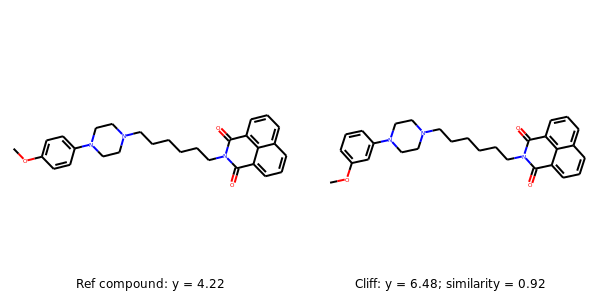

In [139]:
# now, you can have a look at those molecules
Draw.MolsToGridImage([mol1, mol2],molsPerRow=2,subImgSize=(300,300), legends=['Ref compound: y = ' + str(np.round(y_train[mol1_index],2)), 'Cliff: y = ' + str(np.round(y_train[mol2_index],2)) + '; similarity = ' + str(np.round(max_similarities[mol1_index],2))])

LOOK AT HOW SIMILAR THESE COMPOUNDS ARE! (remember, the Y is a logarithm of the affinity to the receptor (in nanomolar units), so 1 unit of difference in the response is huge!)

## Test set

For the test set, we will compute the similarity to the training set compounds. Everything else will work as previously

In [140]:
# data import
X_test = pd.read_csv('/media/fgrisoni/disk2/projects/FG_Activity_cliffs/Activity_cliffs/code/data_curation/data_descriptors/CHEMBL224_test_CATS.csv') # Change with your path
smiles_test = X_test['smiles']
y_test = X_test['Y']

We will use a dedicated function that works in the same way as the previous one

In [141]:
iscliff, index_cliff, max_similarities = cliffs_finder_test(smiles_train, smiles_test, y_train, y_test,activity_thr=1, similarity_thr=0.90)

In [142]:
# a preview of cliffs
np.where(iscliff)

(array([  15,   18,   27,   33,   40,   77,   86,  102,  106,  121,  140,
         159,  163,  180,  219,  242,  254,  270,  276,  341,  344,  357,
         375,  379,  381,  382,  386,  387,  410,  421,  430,  438,  440,
         464,  465,  487,  496,  539,  555,  562,  586,  589,  597,  625,
         630,  637,  638,  642,  651,  684,  699,  765,  779,  789,  806,
         812,  815,  828,  830,  851,  857,  876,  884,  902,  924,  954,
         964,  970,  988,  991,  993, 1000, 1003, 1008, 1009, 1029, 1031,
        1040]),)

In [145]:
mol1_index = 18 # selected molecule (from the previous array, just one random)
mol2_index = index_cliff[mol1_index] # neighbor
# now we convert them into molecules with rdkit
mol1 = Chem.MolFromSmiles(smiles_test[mol1_index]) # careful here! In one case it is test, in the other one is train
mol2 = Chem.MolFromSmiles(smiles_train[mol2_index])

Visualization as before

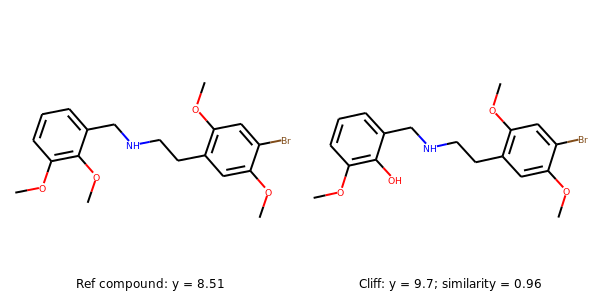

In [146]:
# now, you can have a look at those molecules (careful for indices)
Draw.MolsToGridImage([mol1, mol2],molsPerRow=2,subImgSize=(300,300), legends=['Ref compound: y = ' + str(np.round(y_test[mol1_index],2)), 'Cliff: y = ' + str(np.round(y_train[mol2_index],2)) + '; similarity = ' + str(np.round(max_similarities[mol1_index],2))])